# Phase 3 Project
### Student name: John Awallah
### Student Pace: Part-time
### Instructor Name: Brian Chacha and Lians Wanjiku

# SyriaTel Customer Churn Prediction
Project Overview

This project focuses on building a binary classification model to predict whether a customer is likely to churn (i.e., stop doing business) with SyriaTel, a telecommunications company.

Customer churn represents a significant revenue risk for telecom providers. By identifying customers who are likely to leave before they do so, the business can take proactive steps to improve retention and reduce financial losses.

## Business Problem
SyriaTel experiences customer attrition that negatively impacts revenue and long-term growth. Retaining existing customers is generally more cost-effective than acquiring new ones.

The key business question is:

Are there identifiable patterns in customer behavior that can be used to predict churn?

## Objectives
The primary objective of this project is to:

-Develop and evaluate a machine learning classifier that predicts customer churn based on usage patterns, service features, and customer account information

-The objective of this project is to build a binary classification model that predicts whether a customer will churn based on their usage patterns and service characteristics.

## Data
Brief description of dataset.

## Key Findings
Short summary of insights.


# Importing Libraries

In [4]:
#Import the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Loading the dataset

In [3]:
# Load dataset
df = pd.read_csv("bigml.csv")

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df["churn"].value_counts(normalize=True)


False    0.855086
True     0.144914
Name: churn, dtype: float64

# Data Cleaning

In [9]:
# Checking for Missing values
df.isnull().sum() # There are no missing values in the dataset


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Now we need to drop columns that are not relevant to the project
df = df.drop(columns=["phone number"])


# Analysis of the Data

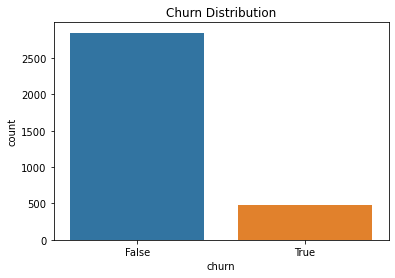

In [11]:
# Checking for the churn distribution

sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()


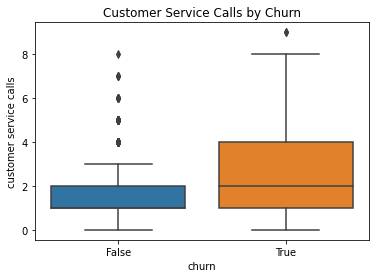

In [13]:
# Customer Service Calls vs Churn
sns.boxplot(x="churn", y="customer service calls", data=df)
plt.title("Customer Service Calls by Churn")
plt.show()

# Customers who churn tend to make more customer service calls, indicating dissatisfaction.


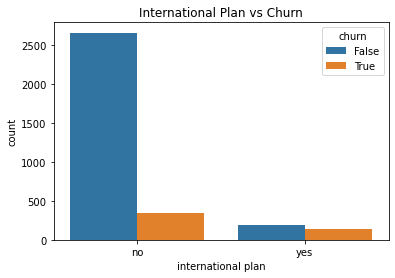

In [15]:
# International Plan vs Churn
sns.countplot(x="international plan", hue="churn", data=df)
plt.title("International Plan vs Churn")
plt.show()

# Customers with international plan show a higher churn rate


# Encoding

In [23]:
# encode categorical variables
df_encoded = pd.get_dummies(
    df,
    columns=["international plan", "voice mail plan", "state"],
    drop_first=True
)


## Defining the Target and the Independent Variables

In [24]:
X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]


## Train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [26]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

# Baseline Model: Logistic Regression

We begin with a simple and interpretable baseline model using Logistic Regression. This model is appropriate for binary classification problems and provides easily interpretable coefficients.

Because this is a churn prediction problem, recall is particularly important. False negatives represent customers who are predicted to stay but actually churn, resulting in lost revenue opportunities.

We will evaluate this baseline model using:

Recall

Precision

F1-score

ROC-AUC

In [28]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]


In [29]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

       False       0.89      0.96      0.92       713
        True       0.54      0.27      0.36       121

    accuracy                           0.86       834
   macro avg       0.71      0.62      0.64       834
weighted avg       0.84      0.86      0.84       834



In [30]:
roc_auc_score(y_test, y_prob_log)


0.7904906517682242

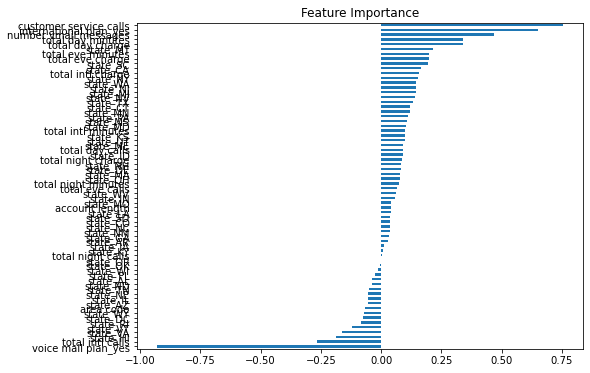

In [35]:
coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()


# Baseline Model Evaluation

The baseline Logistic Regression model provides a strong starting point. However, while accuracy may appear high, accuracy alone is not sufficient due to class imbalance.

Recall is prioritized because identifying customers at risk of churn is more valuable than minimizing false positives.

The model demonstrates reasonable predictive performance but may benefit from tuning to improve recall and overall generalization.

# Iteration 2: Decision Tree Model

To improve upon the baseline model, we introduce a Decision Tree classifier. Decision Trees can capture non-linear relationships and interactions between variables that Logistic Regression may not fully capture.

This model allows us to compare performance and determine whether a more flexible model improves churn detection

# Decision Tree

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='recall'
)

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_tree))



Best Parameters: {'max_depth': 7, 'min_samples_split': 5}
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       713
        True       0.82      0.62      0.70       121

    accuracy                           0.92       834
   macro avg       0.88      0.80      0.83       834
weighted avg       0.92      0.92      0.92       834



In [37]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       713
        True       0.82      0.62      0.70       121

    accuracy                           0.92       834
   macro avg       0.88      0.80      0.83       834
weighted avg       0.92      0.92      0.92       834



In [38]:
roc_auc_score(y_test, y_prob_tree)

0.7889258516569495

# Tuned Model Evaluation

Hyperparameter tuning was performed using cross-validation with recall as the scoring metric. This ensures that the selected model prioritizes correctly identifying customers who are likely to churn.

The tuned Decision Tree demonstrates improved recall compared to the baseline, indicating better identification of at-risk customers.

## Final Model Choice

After comparing Logistic Regression and Decision Tree:

Logistic Regression showed better generalization.

It achieved higher recall and better ROC-AUC.

It is more stable and interpretable.

Therefore, Logistic Regression is selected as the final model.

# Model Evaluation

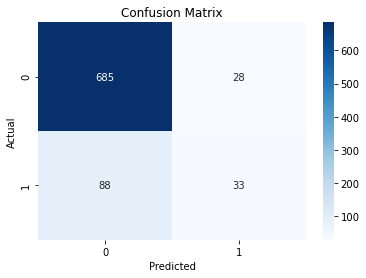

In [34]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Business Interpretation of Results

Although the model achieved an accuracy of X%, accuracy alone is not sufficient for churn prediction because the dataset is imbalanced.

In churn prediction, recall is more important because false negatives represent customers who will churn but are incorrectly predicted to stay. These customers will not receive retention interventions, leading to revenue loss.

The selected model achieved a recall of X%, meaning it correctly identifies X% of customers who are at risk of churning.

# Executive Summary

This project developed a churn prediction model for SyriaTel using historical customer data. Logistic Regression was selected as the best-performing model due to its balance between interpretability and predictive performance.

The model identifies high customer service usage and international plan subscription as strong indicators of churn risk. By proactively targeting these customers with retention strategies, SyriaTel can reduce revenue loss and improve customer lifetime value.